## Modelo generativo para predecir el género de una canción a partir de su letra

### Importando las librerías necesarias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import glob
import os

### Importando el dataset

> generaremos un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas.

> Posteriormente generamos un objeto pd.DataFrame que contenga todos los csv.

In [9]:
# creamos una lista vacía para guardar el dataframe
df_list = []

# extraemos la ruta absoluta de la carpeta "dump"
dir_path = os.path.abspath("dump")

# Obtenemos una lista con los archivos de la carpeta dump
file_list = glob.glob (os.path.join (dir_path, "*.csv"))

# leemos cada archivo csv en la lista de archivos
for i in file_list :
    df = pd.read_csv (i)
    df_list.append (df)

In [10]:
df_final = pd.concat (df_list)

### Observando el conjunto de datos

> Imprimimos las primeras y últimas 5 observaciones

> Observamos que hay 9489 observaciones, 3 atributos y un vector objetivo

> Nos damos cuenta que los nombres de las variables deberemos redefinirlas, además de eliminar la columna unnamed: 0

In [11]:
df_final

,Unnamed: 0,0,1,2,3
0,0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...
...,...,...,...,...,...
246,246,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
247,247,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
248,248,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
249,249,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...


In [12]:
df_final.drop (columns= "Unnamed: 0", inplace=True)

In [13]:
df_final.columns = ["Artista", "Genero", "Nombre_cancion", "Letra_cancion"]

In [14]:
df_final

,Artista,Genero,Nombre_cancion,Letra_cancion
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...
...,...,...,...,...
246,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
247,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
248,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
249,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...


#### Pequeño resumen de los atributos:

1. **`Artista`:** Nombre del artista de la canción
2. **`Genero`:** Género o estilo musical de la canción.
3. **`Nombre_cancion`:** Nombre de la canción.
4. **`Letra_cancion`:** Letra de la canción.


### Método info()

> Aplicamos este método para ver el tipo de dato y la cantidad de nulos de los atributos

> Vemos que no hay valores nulos en ninguna variable, además que todos los atributos son del tipo objeto

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 250
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Artista         9489 non-null   object
 1   Genero          9489 non-null   object
 2   Nombre_cancion  9489 non-null   object
 3   Letra_cancion   9489 non-null   object
dtypes: object(4)
memory usage: 370.7+ KB


### Generamos dos gráficos de barras que resuman la siguiente información:
> La cantidad de canciones registradas por cada artista, ordenados de mayor a menor.

> La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

### De los gráficos observamos lo siguiente:

> El artista con la mayor cantidad de canciones registradas es Eminem, con casi 500 canciones.

> Otros artistas con una cantidad significativa son Bruce Springsteen y Bob Dylan; ambos con más de 400 canciones registradas

> El género musical con la mayor cantidad de canciones registradas es el Rock, con más de 4000, el que sigue es hiphop con poco más de 2500 canciones registradas

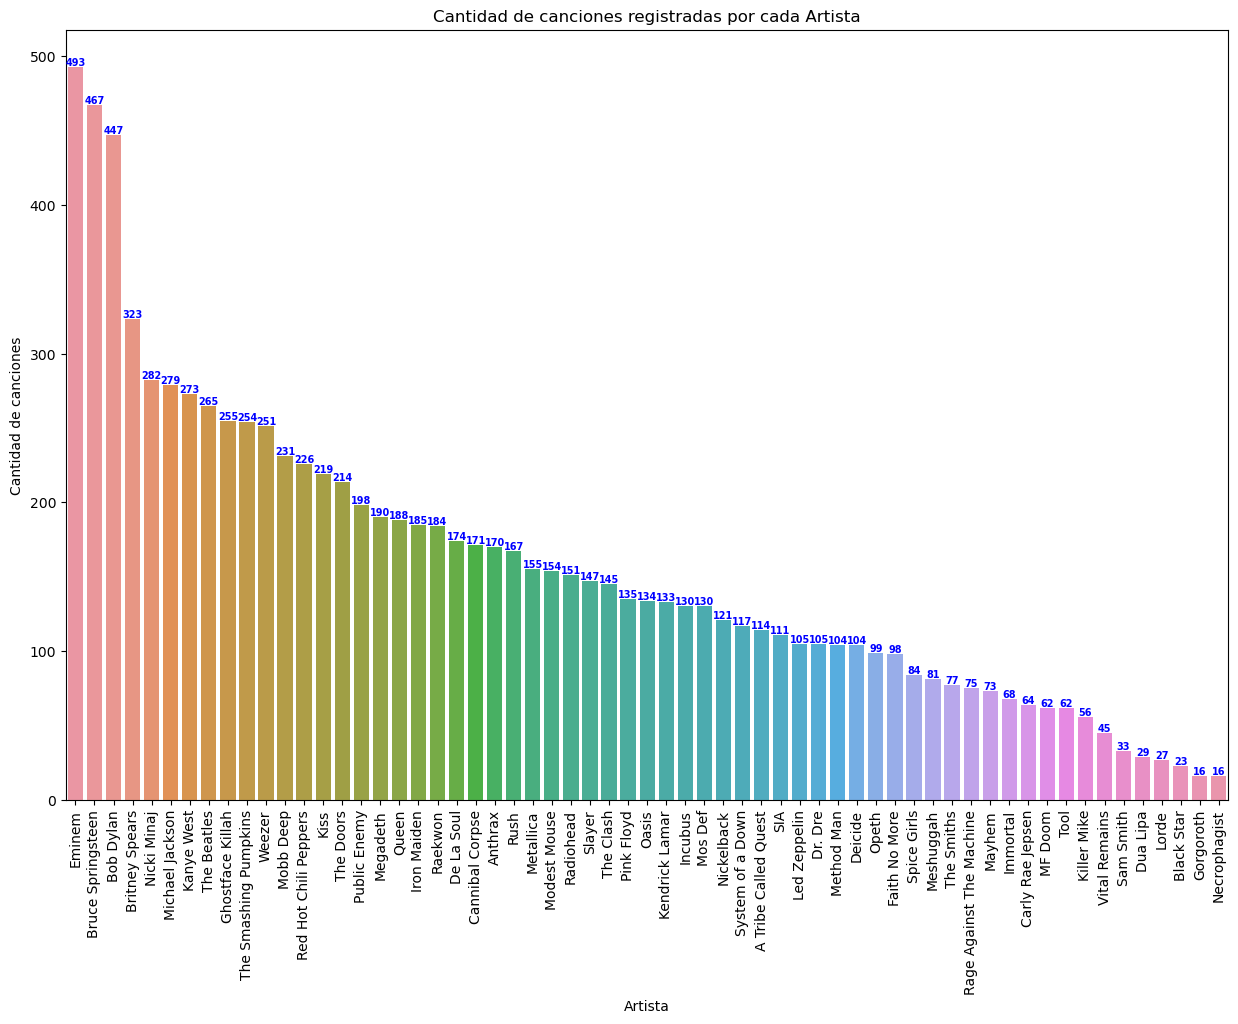

In [16]:
df_artista = df_final.groupby ("Artista").size().sort_values (ascending = False)
plt.figure (figsize = (15, 10))
ax = sns.barplot (x = df_artista.index, y = df_artista.values)
plt.xticks (rotation = 90)
plt.xlabel ("Artista")
plt.ylabel ("Cantidad de canciones")
plt.title ("Cantidad de canciones registradas por cada Artista")
for i, j in enumerate (df_artista.values) :
    ax.text (i, j+1, str (j), color = "blue", fontweight = "bold", ha = "center", fontsize = 7)

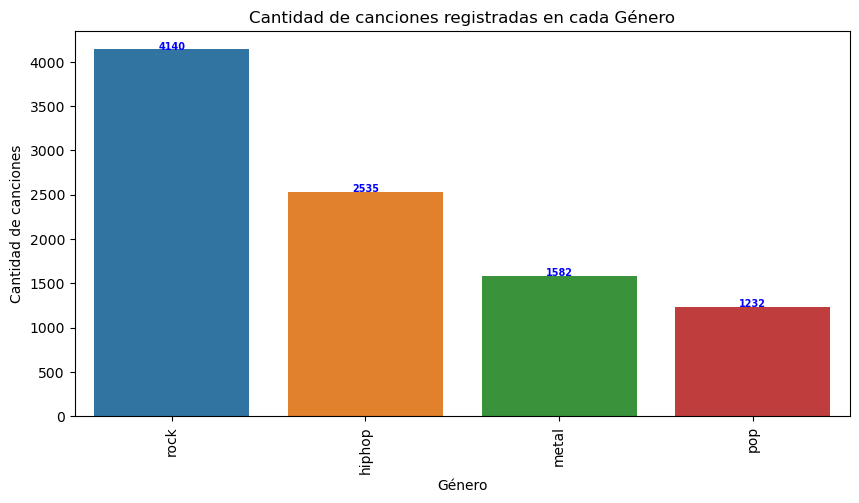

In [17]:
df_genero = df_final.groupby ("Genero").size().sort_values (ascending = False)
plt.figure (figsize = (10, 5))
ax = sns.barplot (x = df_genero.index, y = df_genero.values)
plt.xticks (rotation = 90)
plt.xlabel ("Género")
plt.ylabel ("Cantidad de canciones")
plt.title ("Cantidad de canciones registradas en cada Género")
for i, j in enumerate (df_genero.values) :
    ax.text (i, j+1, str (j), color = "blue", fontweight = "bold", ha = "center", fontsize = 7)

### Matriz de ocurrencias

> Se importa la clase CountVectorizer 

> Este método se utiliza para convertir un conjunto de documentos de texto en una matriz de conteo de términos

> El objetivo principal de esta clase es generar una representación numérica de los documentos de texto que se pueden utilizar como entrada para modelos de aprendizaje automático

In [19]:
# aplicamos la clase para extraer las 500 palabras más repetidas en toda la base de datos

from sklearn.feature_extraction.text import CountVectorizer

# creamos el objeto countvectorizer
cv = CountVectorizer(stop_words="english")

# ajustamos cv a los datos de texto
cv.fit (df_final ["Letra_cancion"])

# obtenemos el vocabulario y la frecuencia
voc = cv.vocabulary_
frec = cv.transform (df_final ["Letra_cancion"]).sum (axis = 0)

# creamos una lista de tuplas, el 1er elemento será la palabra y la 2da la frecuencia de esta
top_words = sorted ([(word, frec[0, idx]) for word, idx in voc.items()], key = lambda x: -x[1])[:100]

# imprimimos las 100 palabras más repetidas
for word, frec in top_words :
    print (f"{word}: {frec}")

like: 19629
don: 17398
know: 14962
got: 14171
just: 13978
love: 11268
yeah: 11071
ll: 10028
oh: 9879
cause: 8356
time: 8037
let: 8009
come: 7866
man: 7467
ain: 7323
make: 6821
baby: 6735
want: 6698
say: 6684
right: 6207
shit: 6128
ve: 5924
way: 5713
life: 5710
wanna: 5356
gonna: 5121
yo: 4859
feel: 4704
need: 4579
fuck: 4537
tell: 4533
nigga: 4334
em: 4292
ya: 4222
day: 4217
away: 4126
world: 4106
good: 3910
think: 3902
night: 3835
look: 3805
little: 3708
said: 3692
girl: 3618
hey: 3341
gotta: 3272
won: 3161
niggas: 3057
god: 3011
mind: 3000
heart: 2861
eyes: 2857
real: 2846
black: 2832
stop: 2811
new: 2803
better: 2801
long: 2781
bitch: 2756
people: 2739
ooh: 2719
really: 2681
head: 2669
money: 2551
live: 2544
hear: 2529
home: 2503
ah: 2476
face: 2437
ass: 2421
big: 2363
did: 2359
hold: 2326
die: 2303
bad: 2217
la: 2202
things: 2186
run: 2176
rock: 2165
try: 2165
uh: 2146
light: 2101
turn: 2078
dead: 2076
leave: 2056
hit: 2048
hard: 2037
gone: 2016
tonight: 2010
till: 2003
high: 1989


> Generamos una función que replique esto, pero para cada genero por separado

In [20]:
def top_words_by_genero(df, genero_col, text_col, n=500):
    """
    Función que extrae las n palabras más repetidas para cada género en una base de datos de canciones.

    Parameters
    ----------
    df : pandas.DataFrame
        La base de datos de canciones.
    genero_col : str
        El nombre de la columna que contiene el género de cada canción.
    text_col : str
        El nombre de la columna que contiene el texto de cada canción.
    n : int, opcional
        El número de palabras más repetidas a extraer (por defecto es 500).

    Returns
    -------
    dict
        Un diccionario que contiene las n palabras más repetidas para cada género, indexado por el nombre del género.
    """
    # Inicializamos un diccionario vacío para almacenar las palabras más repetidas por género
    top_words_by_genero = {}

    # Obtener la lista de géneros únicos
    generos = df[genero_col].unique()

    # Crear un objeto Countvectorizer_2 para cada género y extraer las palabras más repetidas
    for genero in generos:
        # Filtrar las canciones por género
        genero_df = df[df[genero_col] == genero]

        # Crear un objeto CountVectorizer
        vectorizer_2 = CountVectorizer(stop_words="english")

        # Ajustar el vectorizador a los datos de texto
        vectorizer_2.fit(genero_df[text_col])

        # Obtener el vocabulario y las frecuencias de los términos
        voc_2 = vectorizer_2.vocabulary_
        frec_2 = vectorizer_2.transform(genero_df[text_col]).sum(axis=0)

        # Crear una lista de tuplas (palabra, frecuencia) ordenadas por frecuencia descendente
        top_words = sorted([(word_2, frec_2[0, idx_2]) for word_2, idx_2 in voc_2.items()], key=lambda x: -x[1])[:n]

        # Almacenar las palabras más repetidas en el diccionario
        top_words_by_genero[genero] = top_words

    return top_words_by_genero

In [21]:
top_words_by_genero (df_final, "Genero", "Letra_cancion", n=500)

{'metal': [('life', 1233),
  ('don', 1181),
  ('death', 1139),
  ('time', 1096),
  ('ll', 1069),
  ('know', 1048),
  ('just', 993),
  ('blood', 884),
  ('like', 869),
  ('die', 866),
  ('ve', 847),
  ('god', 796),
  ('away', 776),
  ('dead', 771),
  ('eyes', 770),
  ('way', 724),
  ('world', 700),
  ('come', 631),
  ('hell', 598),
  ('yeah', 583),
  ('end', 581),
  ('pain', 567),
  ('kill', 543),
  ('mind', 543),
  ('man', 531),
  ('want', 531),
  ('got', 530),
  ('feel', 516),
  ('oh', 509),
  ('inside', 494),
  ('live', 492),
  ('let', 491),
  ('day', 475),
  ('face', 457),
  ('soul', 456),
  ('think', 427),
  ('make', 420),
  ('head', 416),
  ('say', 415),
  ('gonna', 414),
  ('light', 412),
  ('love', 410),
  ('look', 407),
  ('right', 405),
  ('black', 404),
  ('left', 386),
  ('night', 385),
  ('war', 377),
  ('tell', 370),
  ('evil', 364),
  ('fear', 361),
  ('hear', 358),
  ('hate', 348),
  ('cause', 346),
  ('won', 338),
  ('free', 334),
  ('lies', 334),
  ('fight', 326),
  ('

## Modelación

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
X = df_final['Letra_cancion'] # Variable predictora
y = df_final['Genero'] # Variable a predecir

# Generar muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Definir pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words="english")), # Paso 1: CountVectorizer
    ('clf', MultinomialNB(alpha=0.1)) # Paso 2: Clasificador MultinomialNB
])

# Entrenar modelo
pipeline.fit(X_train, y_train)
yhat = pipeline.predict (X_test)
confusion_matrix(y_test, yhat)

array([[716,   4,  14,  21],
       [ 19, 368,  10,  94],
       [ 38,  13, 177, 126],
       [ 78,  80, 102, 987]], dtype=int64)

> A continuación probaremos el modelo con 5 letras de canciones nuevas, donde el genero de las canciones en orden son: Rock, metal, pop, hip-hop y pop

> Vemos como nuestro modelo predice correctamente 3 de 5 letras de canciones, dando unaprecisión preliminar de 60%

In [26]:
pipeline.predict (['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\
You are not deserving, you are not deserving" #Banks - Drowning
])

array(['rock', 'metal', 'pop', 'pop', 'rock'], dtype='<U6')

In [27]:
yhat = pipeline.predict (X_test)
print (classification_report (y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.84      0.95      0.89       755
       metal       0.79      0.75      0.77       491
         pop       0.58      0.50      0.54       354
        rock       0.80      0.79      0.80      1247

    accuracy                           0.79      2847
   macro avg       0.76      0.75      0.75      2847
weighted avg       0.78      0.79      0.79      2847



> Se observa como la clase pop tiene métricas regulares, una  forma de mejorar estas métricas es aumentando el número de observaciones del género pop

> Veamos como se comporta el modelo, pero ahora con 1315 observaciones más

> Hacemos los mismos procedimientos que antes

In [38]:
df_pop = []

# extraemos la ruta absoluta de la carpeta "dump"
dir_path_pop = os.path.abspath("dump_plus_pop")

# Obtenemos una lista con los archivos de la carpeta dump
file_list_pop = glob.glob (os.path.join (dir_path_pop, "*.csv"))

# leemos cada archivo csv en la lista de archivos
for j in file_list_pop :
    df_plus_pop = pd.read_csv (j)
    df_pop.append (df_plus_pop)

In [39]:
# concatenamos
df_final_pop = pd.concat (df_pop)

In [40]:
df_final_pop.drop (columns= "Unnamed: 0", inplace=True)

> Observamos que en esta base de datos hay 10804 observaciones

In [41]:
df_final_pop.columns = ["Artista", "Genero", "Nombre_cancion", "Letra_cancion"]
df_final_pop

,Artista,Genero,Nombre_cancion,Letra_cancion
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...
...,...,...,...,...
246,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
247,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
248,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
249,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...


In [42]:
X_pop = df_final_pop['Letra_cancion'] # Variable predictora
y_pop = df_final_pop['Genero'] # Variable a predecir

# Generar muestras de entrenamiento y validación
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_pop, y_pop, test_size=0.3, random_state=42)

In [43]:
# Definir pipeline
pipeline_pop = Pipeline([
    ('vect', CountVectorizer(stop_words="english")), # Paso 1: CountVectorizer
    ('clf', MultinomialNB(alpha=0.1)) # Paso 2: Clasificador MultinomialNB
])

# Entrenar modelo
pipeline_pop.fit(X_train_pop, y_train_pop)
yhat_pop = pipeline_pop.predict (X_test_pop)
confusion_matrix(y_test_pop, yhat_pop)

array([[708,   6,  33,  20],
       [ 20, 372,  14,  81],
       [ 85,   9, 499, 153],
       [ 72,  97, 166, 907]], dtype=int64)

- Vemos como a mejorada la precision, recall y f1 para la categoría pop, pero en contraste a habido una disminución en la presicion, recall y f1 para las otras categorias
- La precisión global del modelo a disminuido del 79% al 77%
- A pesar de que la precisión para la categoría "pop" ha mejorado, todavía es más baja en comparación con las otras categorías. Por lo tanto, aún se podría considerar ajustar el modelo o agregar más datos para mejorar el rendimiento en esta categoría.
- Estos resultados sugieren que el modelo aún tiene margen de mejora y se podría seguir trabajando para optimizarlo.
- Se podría seguir trabajando en la mejora del modelo, ajustando los parámetros, agregando más datos o considerando diferentes algoritmos de clasificación para lograr un mejor rendimiento en la clasificación de las categorías de música.

In [46]:
# Métricas originales
yhat = pipeline.predict (X_test)
print (classification_report (y_test, yhat))

              precision    recall  f1-score   support

      hiphop       0.84      0.95      0.89       755
       metal       0.79      0.75      0.77       491
         pop       0.58      0.50      0.54       354
        rock       0.80      0.79      0.80      1247

    accuracy                           0.79      2847
   macro avg       0.76      0.75      0.75      2847
weighted avg       0.78      0.79      0.79      2847



In [47]:

# Métricas agregando más observaciones en la clase pop
yhat_pop = pipeline_pop.predict (X_test_pop)
print (classification_report (y_test_pop, yhat_pop))

              precision    recall  f1-score   support

      hiphop       0.80      0.92      0.86       767
       metal       0.77      0.76      0.77       487
         pop       0.70      0.67      0.68       746
        rock       0.78      0.73      0.75      1242

    accuracy                           0.77      3242
   macro avg       0.76      0.77      0.77      3242
weighted avg       0.77      0.77      0.76      3242

